# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

289


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 4d8bdcbd-f453-410d-964e-05933854df62
Data columns (total 9 columns):
distance            289 non-null float64
drive_time          289 non-null float64
month               289 non-null int64
price               289 non-null int64
cash                116 non-null float64
peak                116 non-null float64
pickup_datetime     289 non-null datetime64[ns]
drop_datetime       289 non-null datetime64[ns]
shop_position_id    289 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 22.6+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
# df.head(3)

## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 2, 1).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
c3864aa7-61e9-48b1-b6fe-cb62b04142e8,1.72,11.8,2,426,1713.0,0.0,2020-02-01 10:41:00,2020-02-01 11:05:00,35.581199645996094-139.64149475097656,2020-02-01,5,Saturday,1,10,5
20cb3037-75c5-46df-951c-595fe013b6f2,3.43,25.9,2,637,1598.0,120.0,2020-02-01 11:07:00,2020-02-01 11:37:00,35.58024215698242-139.6634521484375,2020-02-01,5,Saturday,1,11,5
2af52552-f96f-4614-9c83-972e435d3eb6,1.16,24.8,2,495,0.0,0.0,2020-02-01 11:45:00,2020-02-01 12:12:00,35.57353973388672-139.6583251953125,2020-02-01,5,Saturday,1,11,5
fd3302e4-8c40-4e85-8317-59d3f6221069,2.14,14.4,2,628,1273.0,180.0,2020-02-01 12:18:00,2020-02-01 12:41:00,35.581207275390625-139.64134216308594,2020-02-01,5,Saturday,1,12,5
915873a2-1d69-446e-8dcd-7d601d6da06a,1.03,10.4,2,388,0.0,0.0,2020-02-01 13:24:00,2020-02-01 13:39:00,35.5811767578125-139.64141845703122,2020-02-01,5,Saturday,1,13,5
24c03778-7615-4923-8d18-24fa58306470,1.50,15.2,2,553,0.0,0.0,2020-02-01 17:56:00,2020-02-01 18:13:00,35.57521057128906-139.65931701660156,2020-02-01,5,Saturday,1,17,5
4d8bdcbd-f453-410d-964e-05933854df62,0.55,9.6,2,533,0.0,0.0,2020-02-01 18:18:00,2020-02-01 18:26:00,35.57823944091797-139.66018676757812,2020-02-01,5,Saturday,1,18,5
22aea1dc-3cf9-4185-8238-8b336a61b440,1.96,14.9,2,608,770.0,170.0,2020-02-01 18:31:00,2020-02-01 18:48:00,35.574546813964844-139.65887451171878,2020-02-01,5,Saturday,1,18,5
e44a56f7-9058-4052-976e-311cda1ccf38,1.90,16.4,2,545,0.0,0.0,2020-02-01 18:50:00,2020-02-01 19:18:00,35.575416564941406-139.65943908691406,2020-02-01,5,Saturday,1,18,5


In [33]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [35]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロングドロップ{}件, ピーク{}件({}円), 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, peak_sum, cash_count))

2020-02-01  配達件数: 11件, 配達時間: 3.0h, 配達距離: 20.1km, 配達報酬: 5842円, ロングドロップ4件, ピーク3件(470円), 現金5件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2019-12-12,3,1.2,4.75,1254,1,0,0,14.7,4.08
2019-12-13,7,2.7,14.01,3223,3,0,0,11.5,5.22
2019-12-15,9,3.6,12.91,4559,2,0,0,16.5,3.64
2019-12-16,7,2.1,6.48,3119,0,0,0,19.4,3.10
2019-12-17,3,1.5,5.29,1588,1,0,0,16.8,3.57
2019-12-18,7,3.4,18.90,3570,4,0,0,10.7,5.61
2019-12-19,11,4.0,24.32,5492,6,0,0,9.9,6.04
2019-12-24,11,3.6,15.82,5341,0,0,0,13.6,4.41
2019-12-25,1,0.3,1.03,388,0,0,0,17.2,3.49


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,42,10.4,67.94,20883,13,13,22,9.2,6.51
4,41,9.7,71.68,20739,13,8,23,8.2,7.36
5,33,8.9,58.73,16100,10,9,20,9.1,6.63
50,21,8.5,36.08,9938,7,0,0,14.1,4.26
51,28,11.0,54.99,13769,11,0,0,12.0,5.01
52,39,10.6,61.73,19793,7,0,0,10.3,5.84


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,178,44.5,290.82,85787,50,27,60,9.2,6.54
2,11,3.0,20.10,5842,4,3,5,9.0,6.68
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

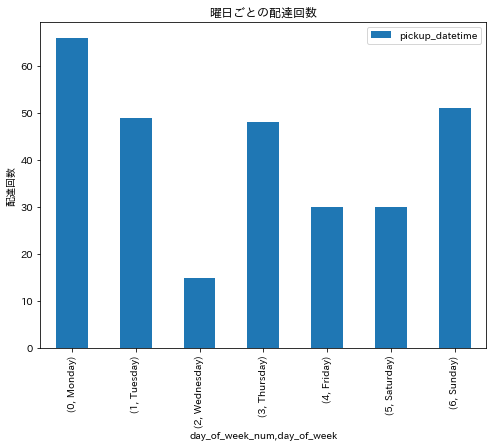

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

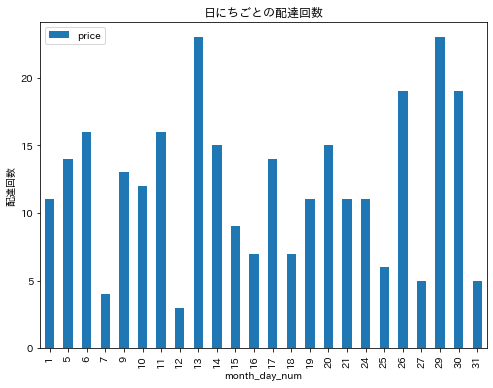

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

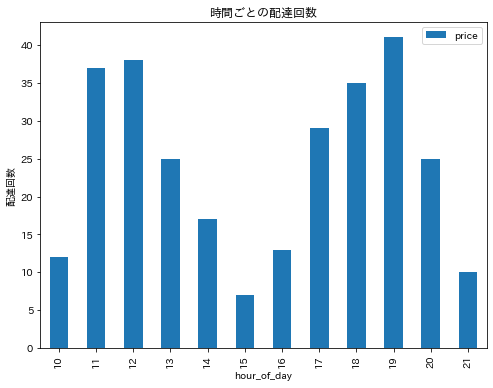

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

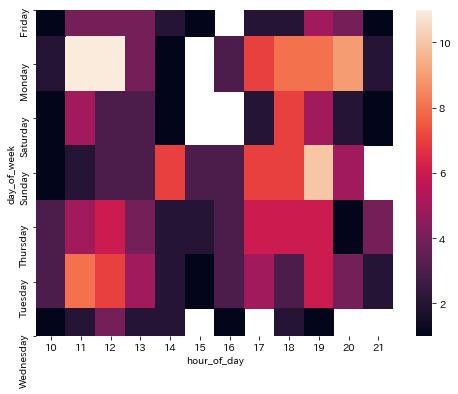

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)